In [29]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
waqi786_brain_tumor_dataset_path = kagglehub.dataset_download('waqi786/brain-tumor-dataset')

print('Data source import complete.')

Data source import complete.


In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_brain_tumor = pd.read_csv('/content/brain_tumor_dataset.csv')

# Display the first few rows and the columns of the dataset
df_brain_tumor.head(), df_brain_tumor.columns


(          Tumor Type        Location  Size (cm) Grade  Patient Age  Gender
 0  Oligodendroglioma  Occipital Lobe       9.23     I           48  Female
 1         Ependymoma  Occipital Lobe       0.87    II           47    Male
 2         Meningioma  Occipital Lobe       2.33    II           12  Female
 3         Ependymoma  Occipital Lobe       1.45   III           38  Female
 4         Ependymoma       Brainstem       6.45     I           35  Female,
 Index(['Tumor Type', 'Location', 'Size (cm)', 'Grade', 'Patient Age',
        'Gender'],
       dtype='object'))

In [31]:
# Get basic information about the dataset
df_brain_tumor.info()

# Get summary statistics for numerical columns
df_brain_tumor.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tumor Type   1000 non-null   object 
 1   Location     1000 non-null   object 
 2   Size (cm)    1000 non-null   float64
 3   Grade        1000 non-null   object 
 4   Patient Age  1000 non-null   int64  
 5   Gender       1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


,Size (cm),Patient Age
count,1000.000000,1000.000000
mean,5.221500,43.519000
std,2.827318,25.005818
min,0.510000,1.000000
25%,2.760000,22.000000
50%,5.265000,43.000000
75%,7.692500,65.000000
max,10.000000,89.000000


In [32]:
# Check for missing values
df_brain_tumor.isnull().sum()

# Drop rows with missing values (if any)
df_brain_tumor_cleaned = df_brain_tumor.dropna()

# Verify if any missing values remain
df_brain_tumor_cleaned.isnull().sum()


,0
Tumor Type,0
Location,0
Size (cm),0
Grade,0
Patient Age,0
Gender,0


In [33]:
# Check the data types of the columns
df_brain_tumor_cleaned.dtypes

# Convert categorical columns to category type for better performance
df_brain_tumor_cleaned['Tumor Type'] = df_brain_tumor_cleaned['Tumor Type'].astype('category')
df_brain_tumor_cleaned['Location'] = df_brain_tumor_cleaned['Location'].astype('category')
df_brain_tumor_cleaned['Grade'] = df_brain_tumor_cleaned['Grade'].astype('category')
df_brain_tumor_cleaned['Gender'] = df_brain_tumor_cleaned['Gender'].astype('category')

# Check data types again
df_brain_tumor_cleaned.dtypes


,0
Tumor Type,category
Location,category
Size (cm),float64
Grade,category
Patient Age,int64
Gender,category


<ipython-input-34-0a750c298138>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_brain_tumor_cleaned, x='Tumor Type', palette='viridis')


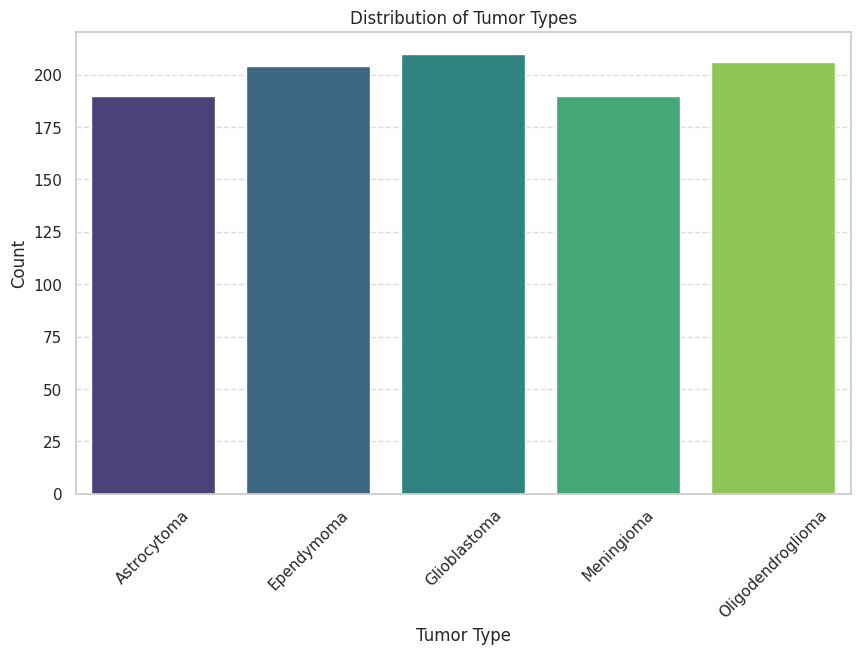

In [34]:
# Plot distribution of tumor types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_brain_tumor_cleaned, x='Tumor Type', palette='viridis')
plt.title('Distribution of Tumor Types')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-35-28632aa31977>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_brain_tumor_cleaned, x='Location', palette='viridis')


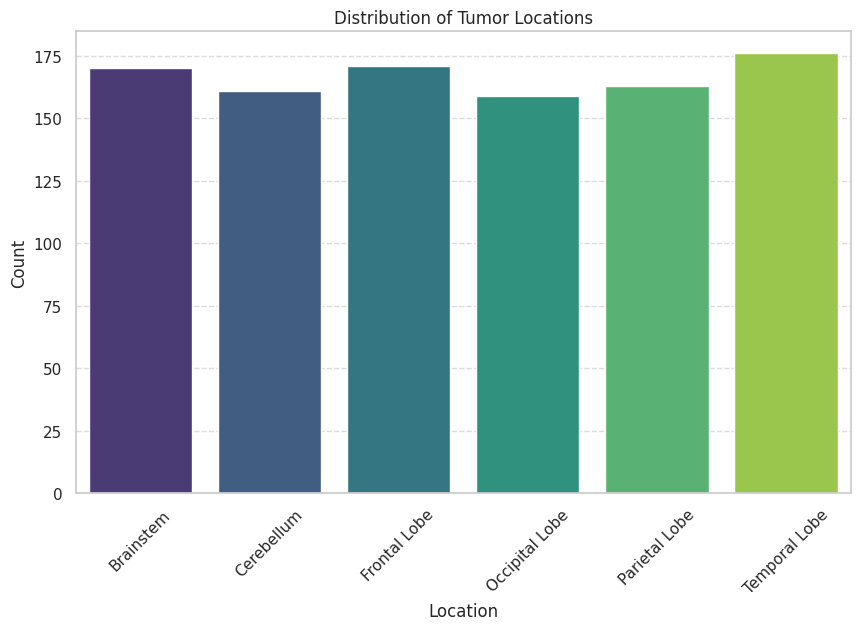

In [35]:
# Plot distribution of tumor locations
plt.figure(figsize=(10, 6))
sns.countplot(data=df_brain_tumor_cleaned, x='Location', palette='viridis')
plt.title('Distribution of Tumor Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


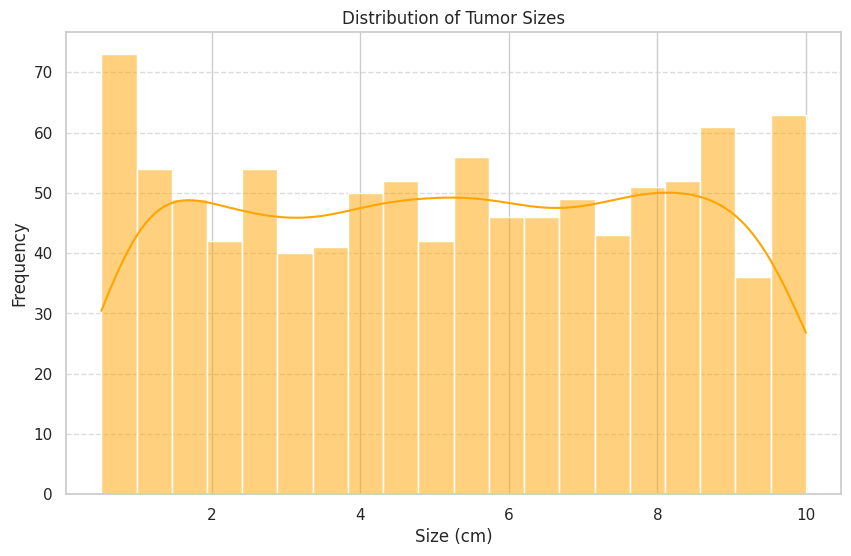

In [36]:
# Plot distribution of tumor sizes
plt.figure(figsize=(10, 6))
sns.histplot(df_brain_tumor_cleaned['Size (cm)'], bins=20, kde=True, color='orange')
plt.title('Distribution of Tumor Sizes')
plt.xlabel('Size (cm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-37-e1a99cbe2887>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_brain_tumor_cleaned, x='Grade', palette='viridis')


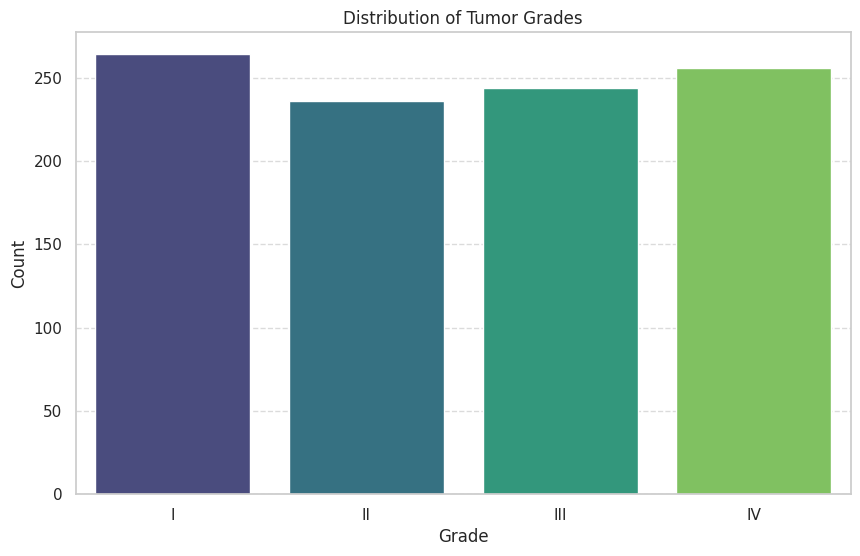

In [37]:
# Plot distribution of tumor grades
plt.figure(figsize=(10, 6))
sns.countplot(data=df_brain_tumor_cleaned, x='Grade', palette='viridis')
plt.title('Distribution of Tumor Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


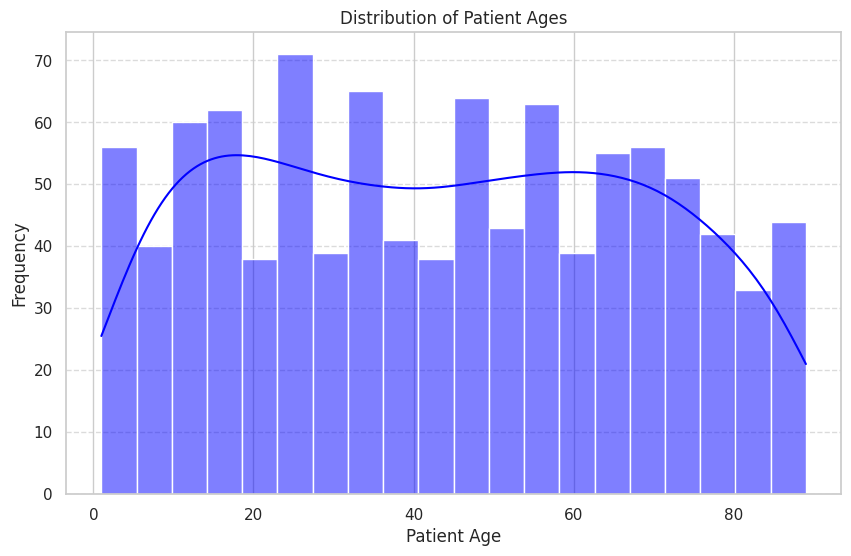

In [38]:
# Plot distribution of patient ages
plt.figure(figsize=(10, 6))
sns.histplot(df_brain_tumor_cleaned['Patient Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Patient Ages')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-39-ff6ab9d84363>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_brain_tumor_cleaned, x='Gender', palette='viridis')


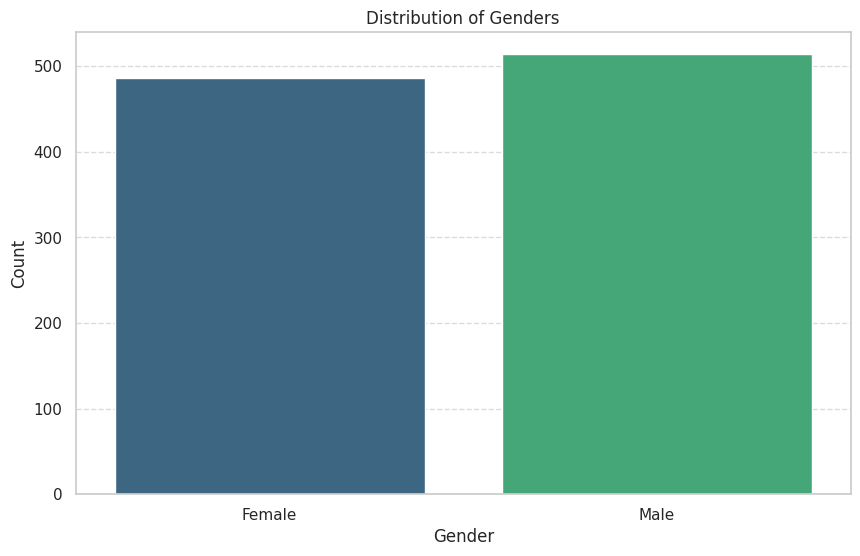

In [39]:
# Plot distribution of genders
plt.figure(figsize=(10, 6))
sns.countplot(data=df_brain_tumor_cleaned, x='Gender', palette='viridis')
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-40-030b0dfac5a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Tumor Type', y='Size (cm)', palette='viridis')


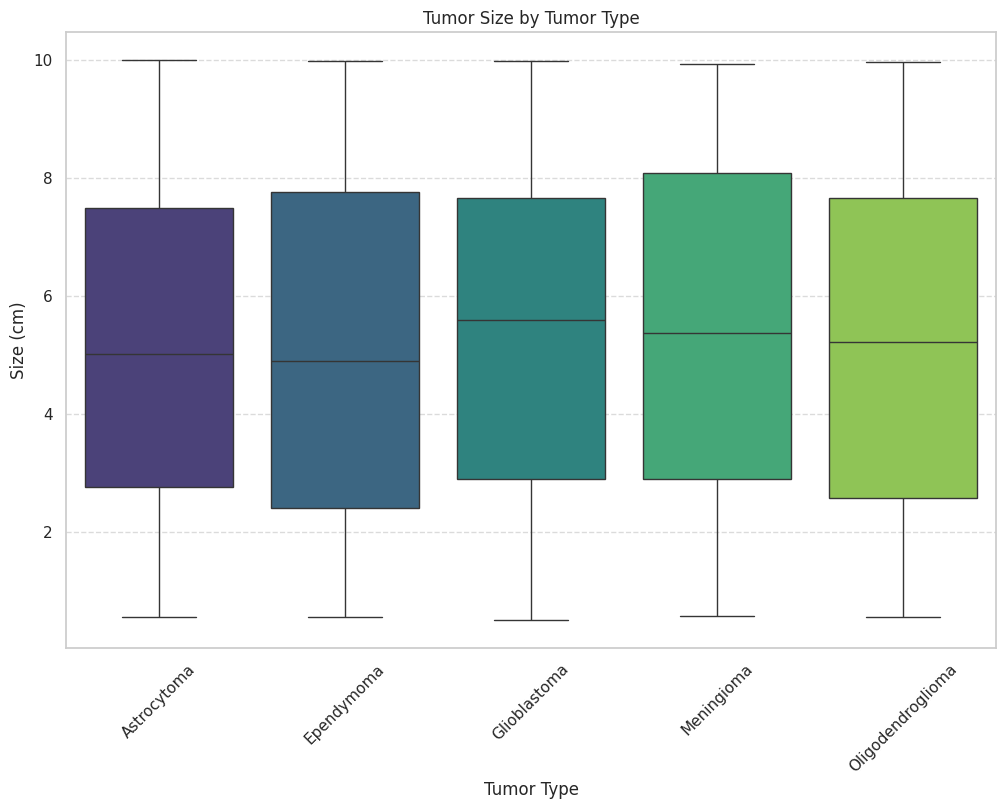

In [40]:
# Plot average tumor size by tumor type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_brain_tumor_cleaned, x='Tumor Type', y='Size (cm)', palette='viridis')
plt.title('Tumor Size by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Size (cm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-42-2b2eb0473ed4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Location', y='Size (cm)', palette='viridis')


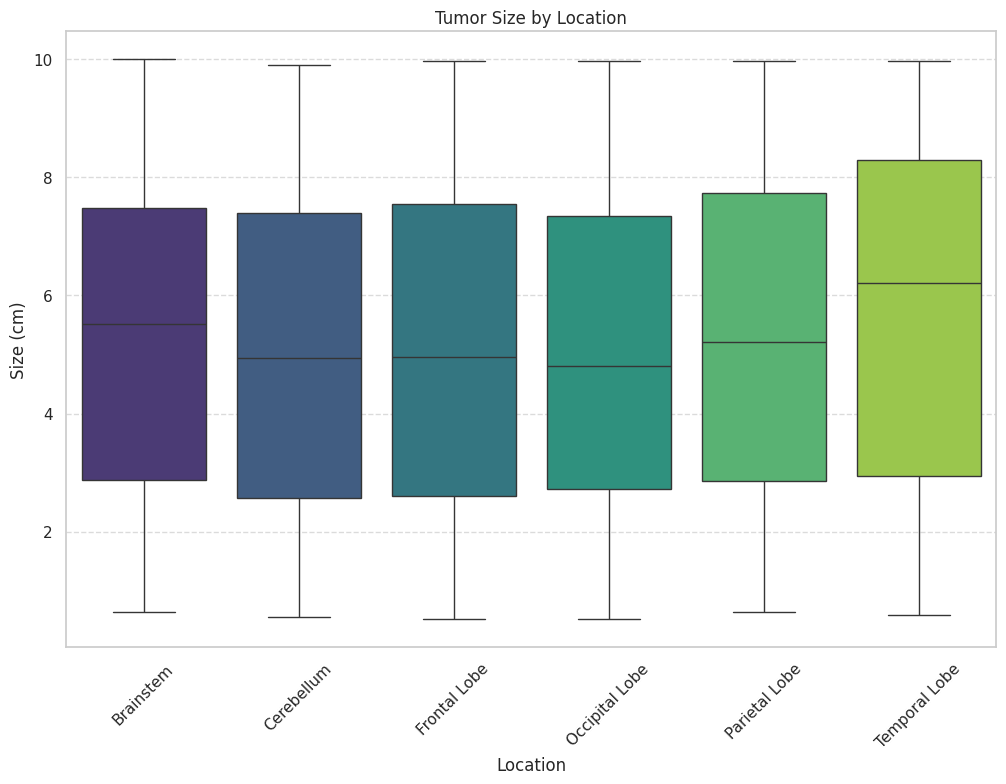

In [42]:
# Plot average tumor size by tumor location
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_brain_tumor_cleaned, x='Location', y='Size (cm)', palette='viridis')
plt.title('Tumor Size by Location')
plt.xlabel('Location')
plt.ylabel('Size (cm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-43-f28a098fd1bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Grade', y='Size (cm)', palette='viridis')


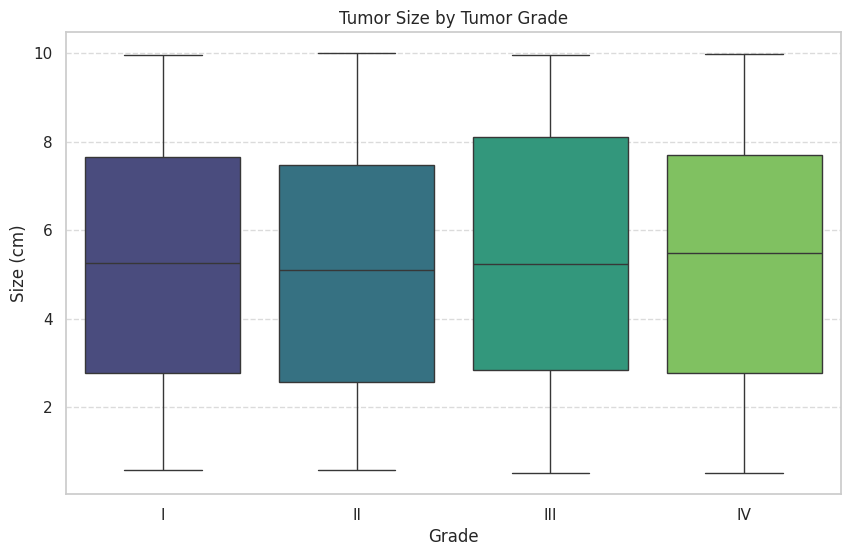

In [43]:
# Plot average tumor size by tumor grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_brain_tumor_cleaned, x='Grade', y='Size (cm)', palette='viridis')
plt.title('Tumor Size by Tumor Grade')
plt.xlabel('Grade')
plt.ylabel('Size (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-44-8a9442b54fc1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Tumor Type', y='Patient Age', palette='viridis')


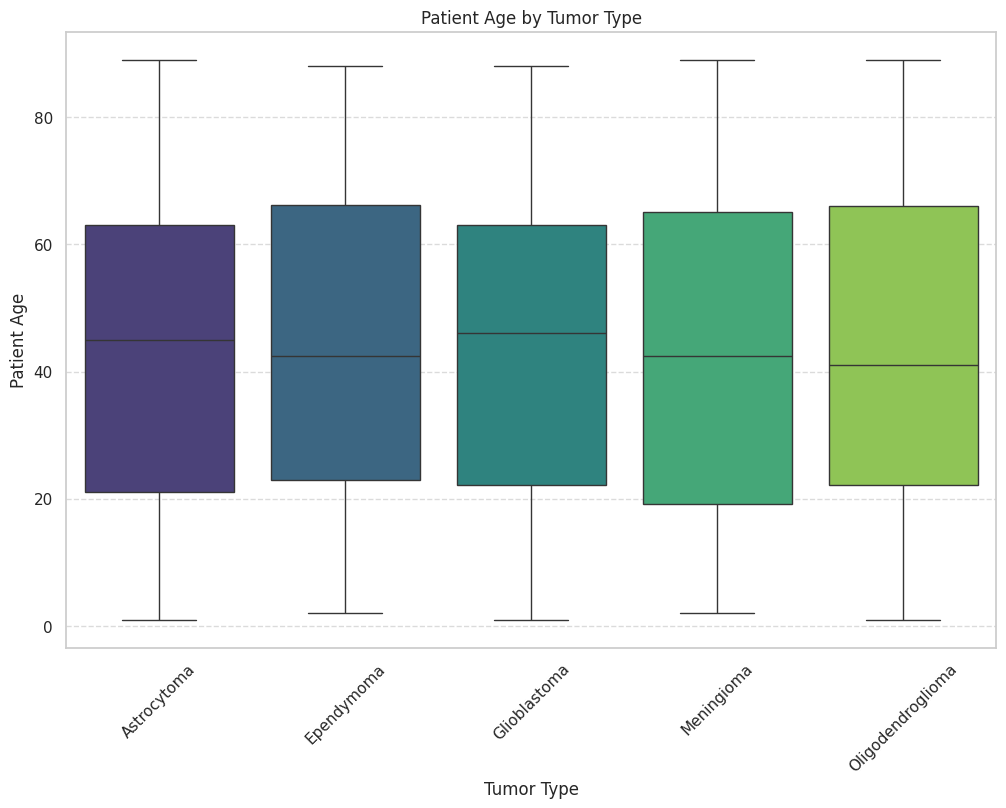

In [44]:
# Plot average patient age by tumor type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_brain_tumor_cleaned, x='Tumor Type', y='Patient Age', palette='viridis')
plt.title('Patient Age by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Patient Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-45-14401b3c9fcb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Location', y='Patient Age', palette='viridis')


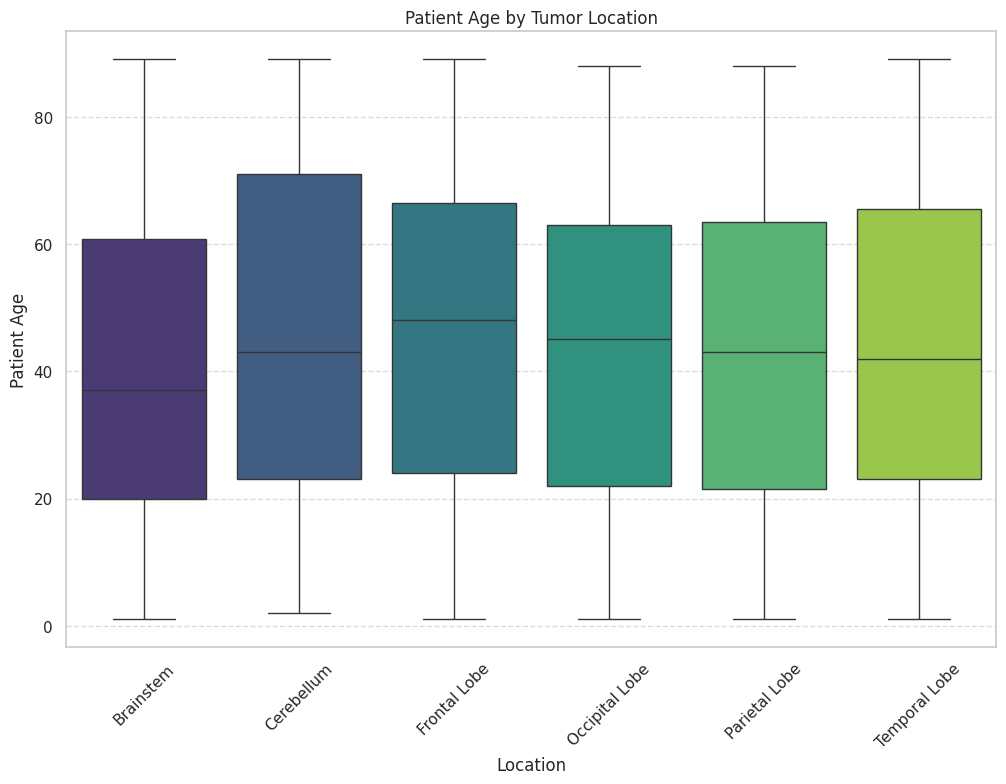

In [45]:
# Plot average patient age by tumor location
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_brain_tumor_cleaned, x='Location', y='Patient Age', palette='viridis')
plt.title('Patient Age by Tumor Location')
plt.xlabel('Location')
plt.ylabel('Patient Age')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-46-c6b114076af3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Grade', y='Patient Age', palette='viridis')


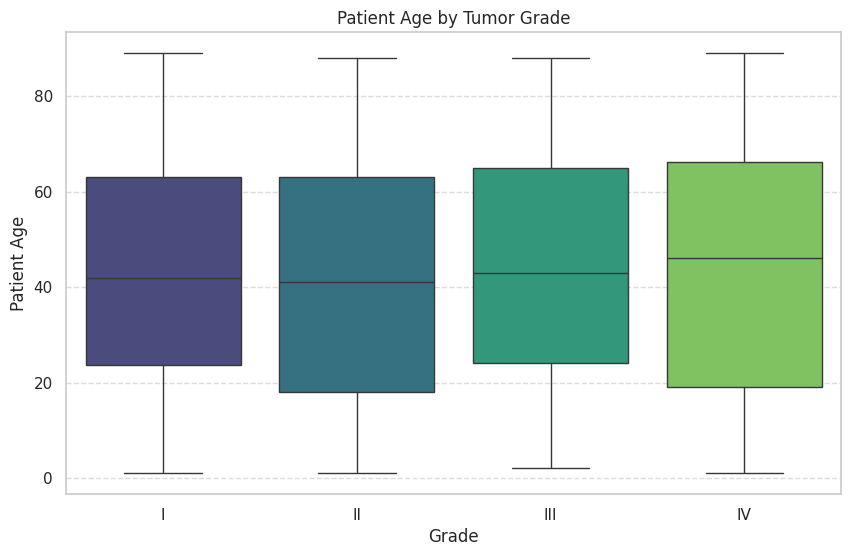

In [46]:
# Plot average patient age by tumor grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_brain_tumor_cleaned, x='Grade', y='Patient Age', palette='viridis')
plt.title('Patient Age by Tumor Grade')
plt.xlabel('Grade')
plt.ylabel('Patient Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


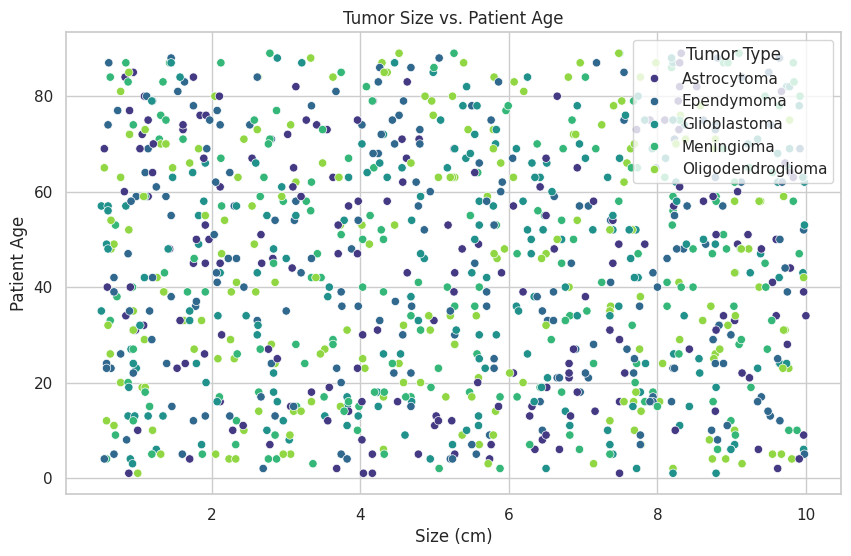

In [47]:
# Plot correlation between tumor size and patient age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_brain_tumor_cleaned, x='Size (cm)', y='Patient Age', hue='Tumor Type', palette='viridis')
plt.title('Tumor Size vs. Patient Age')
plt.xlabel('Size (cm)')
plt.ylabel('Patient Age')
plt.grid(True)
plt.show()


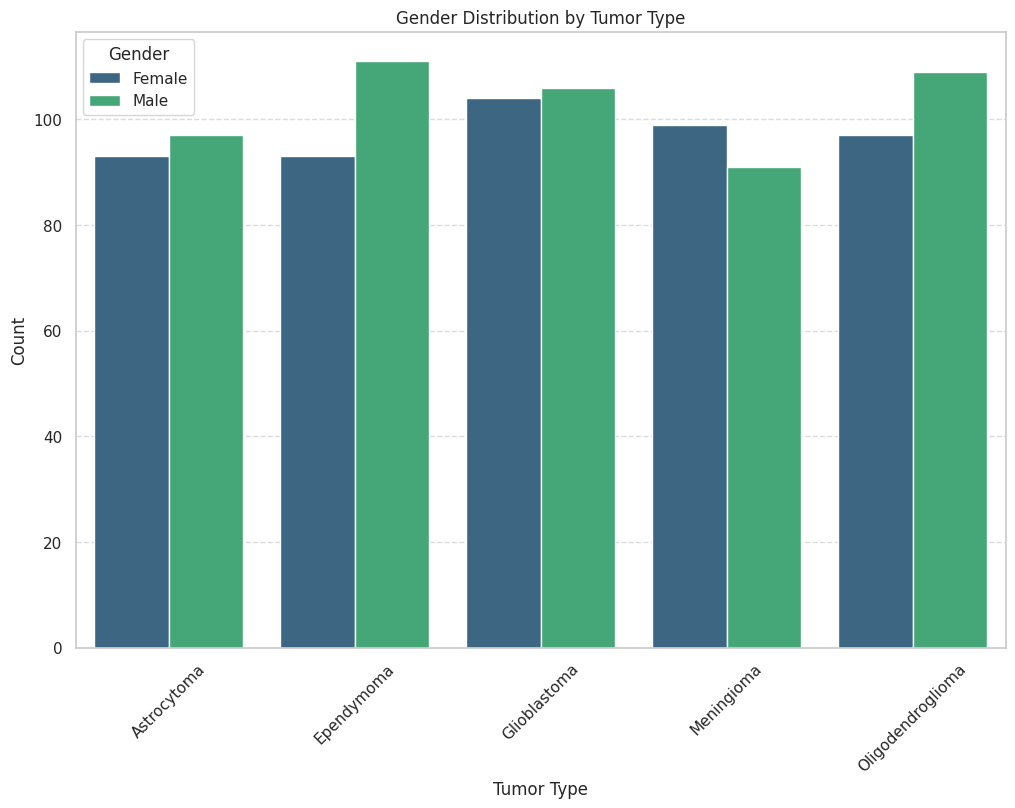

In [48]:
# Plot gender distribution by tumor type
plt.figure(figsize=(12, 8))
sns.countplot(data=df_brain_tumor_cleaned, x='Tumor Type', hue='Gender', palette='viridis')
plt.title('Gender Distribution by Tumor Type')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


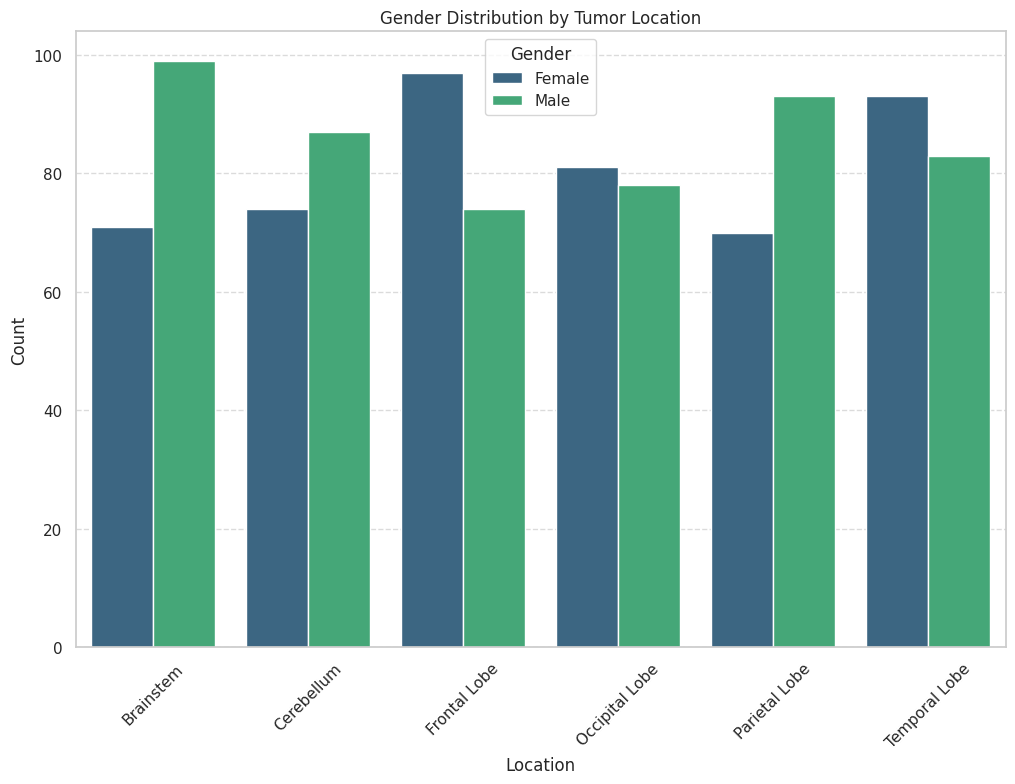

In [49]:
# Plot gender distribution by tumor location
plt.figure(figsize=(12, 8))
sns.countplot(data=df_brain_tumor_cleaned, x='Location', hue='Gender', palette='viridis')
plt.title('Gender Distribution by Tumor Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


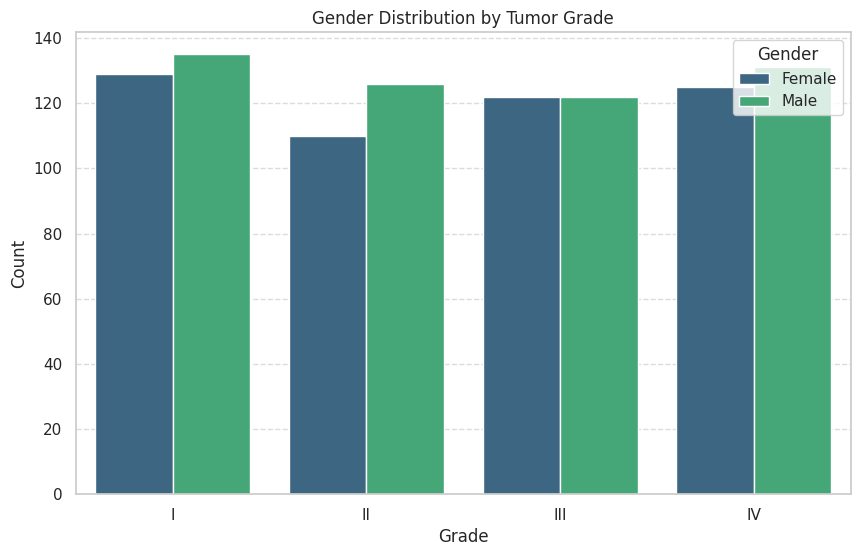

In [50]:
# Plot gender distribution by tumor grade
plt.figure(figsize=(10, 6))
sns.countplot(data=df_brain_tumor_cleaned, x='Grade', hue='Gender', palette='viridis')
plt.title('Gender Distribution by Tumor Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


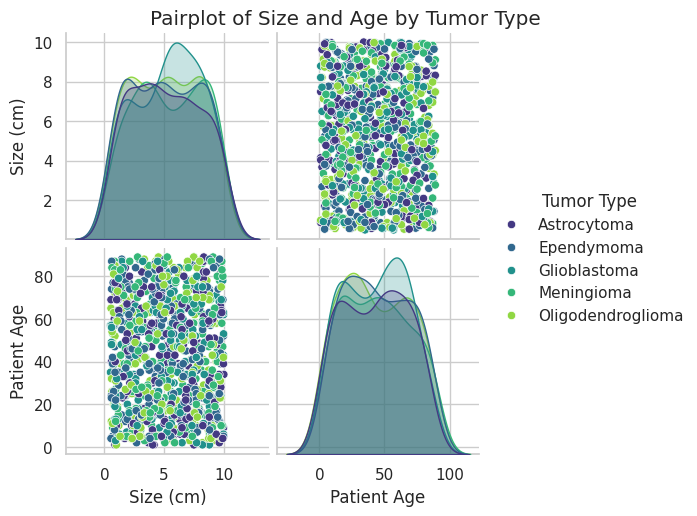

In [51]:
# Plot pairplot for numerical features
sns.pairplot(df_brain_tumor_cleaned, vars=['Size (cm)', 'Patient Age'], hue='Tumor Type', palette='viridis')
plt.suptitle('Pairplot of Size and Age by Tumor Type', y=1.02)
plt.show()


<ipython-input-52-a79b861e9e11>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Gender', y='Size (cm)', palette='viridis')


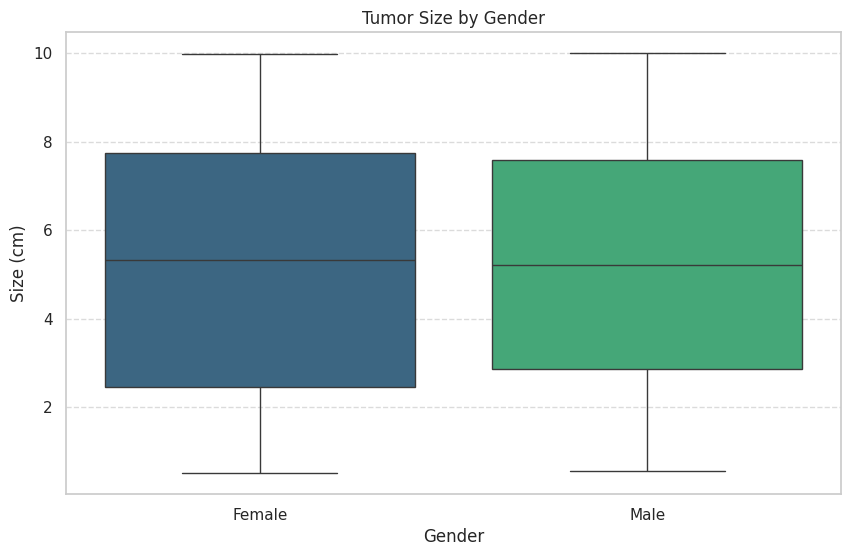

In [52]:
# Plot tumor size distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_brain_tumor_cleaned, x='Gender', y='Size (cm)', palette='viridis')
plt.title('Tumor Size by Gender')
plt.xlabel('Gender')
plt.ylabel('Size (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


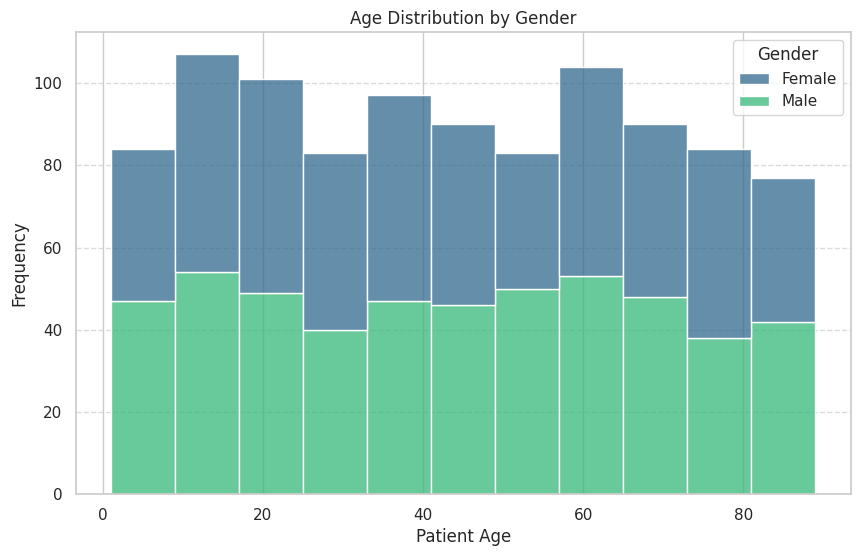

In [53]:
# Plot age distribution by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=df_brain_tumor_cleaned, x='Patient Age', hue='Gender', multiple='stack', palette='viridis')
plt.title('Age Distribution by Gender')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


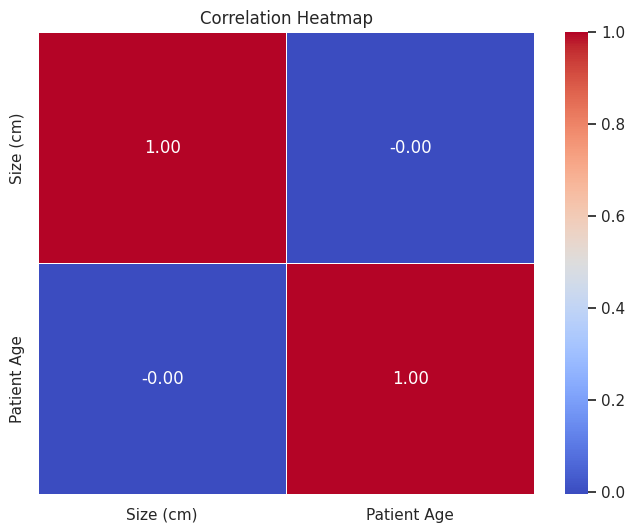

In [54]:
# Compute the correlation matrix
corr = df_brain_tumor_cleaned[['Size (cm)', 'Patient Age']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-55-558560853200>:38: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_brain_tumor_cleaned['Size (cm)'], ax=axes[0, 1], color=colors['Tumor Size'], shade=True)
<ipython-input-55-558560853200>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_brain_tumor_cleaned, x='Tumor Type', y='Size (cm)', palette=[colors['Tumor Size']] * len(df_brain_tumor_cleaned['Tumor Type'].unique()), ax=axes[0, 2])
<ipython-input-55-558560853200>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_brain_tumor_cleaned, x='Location', palette=[colors['Tumor Location

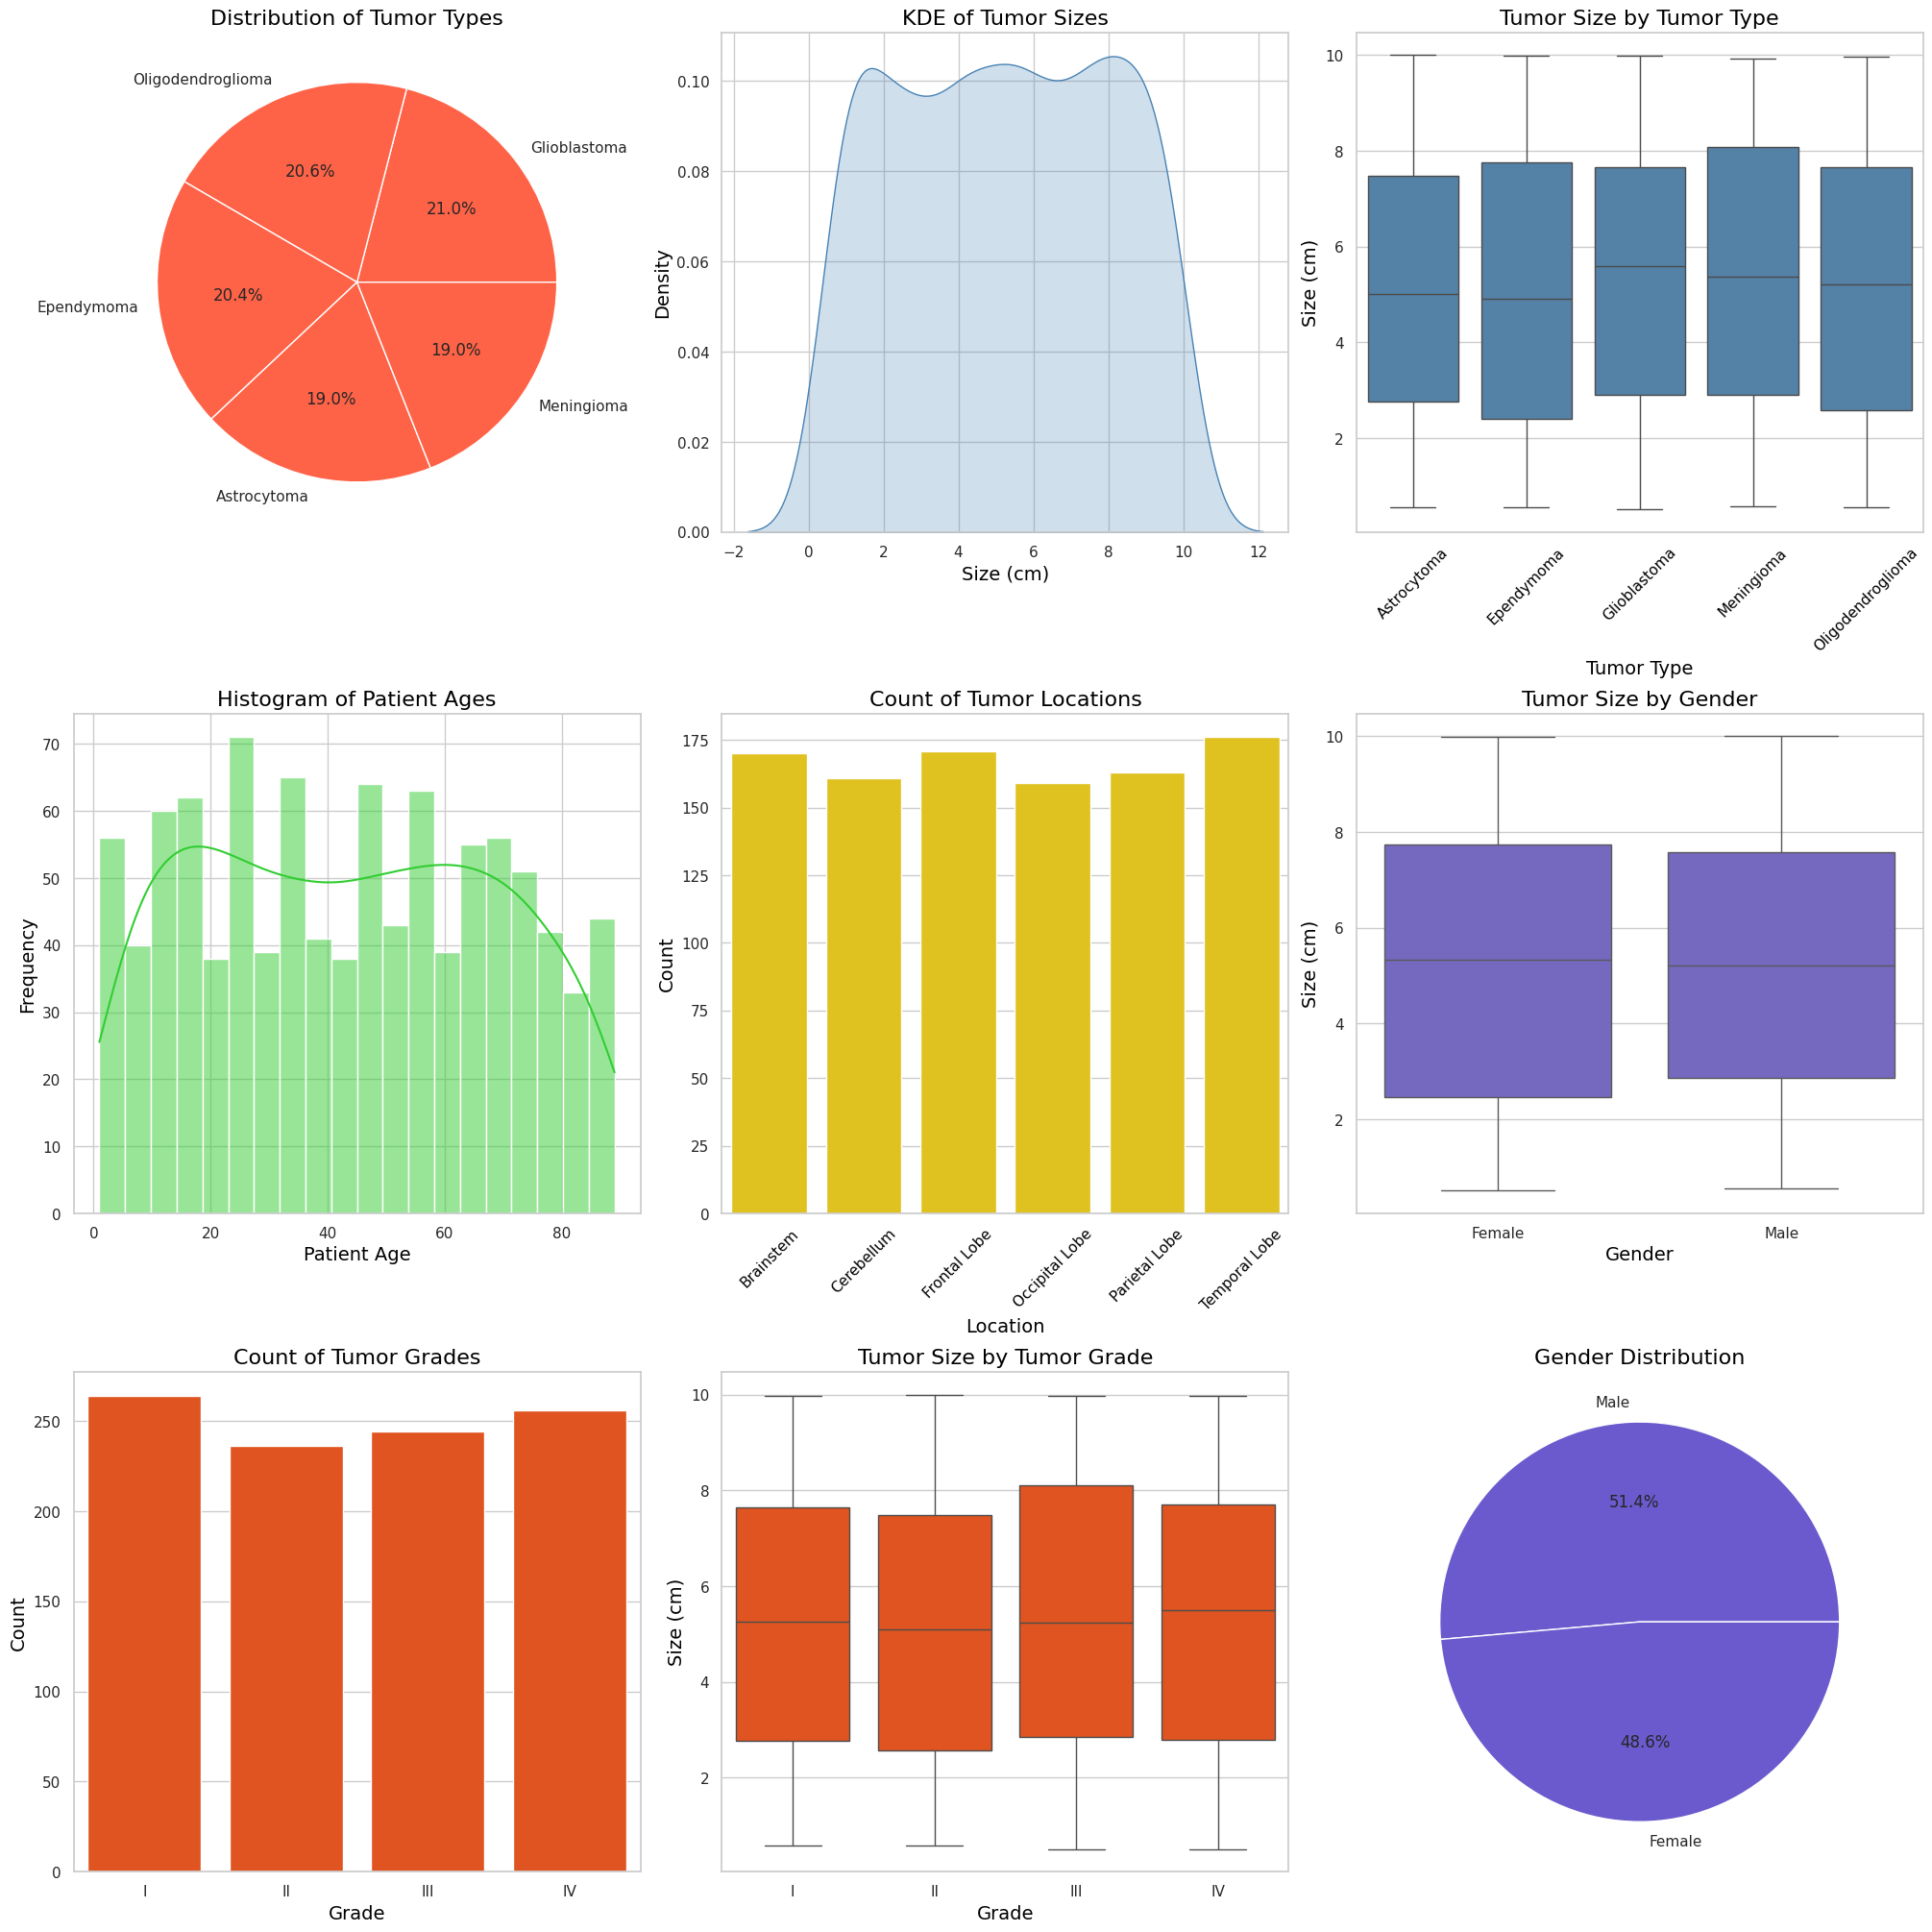

In [55]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_brain_tumor = pd.read_csv('/content/brain_tumor_dataset.csv')

# Clean the dataset
df_brain_tumor_cleaned = df_brain_tumor.dropna()
df_brain_tumor_cleaned['Tumor Type'] = df_brain_tumor_cleaned['Tumor Type'].astype('category')
df_brain_tumor_cleaned['Location'] = df_brain_tumor_cleaned['Location'].astype('category')
df_brain_tumor_cleaned['Grade'] = df_brain_tumor_cleaned['Grade'].astype('category')
df_brain_tumor_cleaned['Gender'] = df_brain_tumor_cleaned['Gender'].astype('category')

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(20, 20), constrained_layout=True)

# Define the color palette
colors = {
    'Tumor Type': '#FF6347',  # Tomato Red
    'Tumor Size': '#4682B4',  # Steel Blue
    'Patient Age': '#32CD32',  # Lime Green
    'Tumor Location': '#FFD700', # Gold
    'Gender': '#6A5ACD',      # Slate Blue
    'Tumor Grade': '#FF4500'   # Orange Red
}

# Plot 1: Distribution of Tumor Types using Pie Chart
tumor_type_counts = df_brain_tumor_cleaned['Tumor Type'].value_counts()
axes[0, 0].pie(tumor_type_counts, labels=tumor_type_counts.index, autopct='%1.1f%%', colors=[colors['Tumor Type']] * len(tumor_type_counts))
axes[0, 0].set_title('Distribution of Tumor Types', fontsize=16, color='black')

# Plot 2: Distribution of Tumor Sizes using KDE Plot
sns.kdeplot(df_brain_tumor_cleaned['Size (cm)'], ax=axes[0, 1], color=colors['Tumor Size'], shade=True)
axes[0, 1].set_title('KDE of Tumor Sizes', fontsize=16, color='black')
axes[0, 1].set_xlabel('Size (cm)', fontsize=14, color='black')
axes[0, 1].set_ylabel('Density', fontsize=14, color='black')

# Plot 3: Box Plot of Tumor Size by Tumor Type
sns.boxplot(data=df_brain_tumor_cleaned, x='Tumor Type', y='Size (cm)', palette=[colors['Tumor Size']] * len(df_brain_tumor_cleaned['Tumor Type'].unique()), ax=axes[0, 2])
axes[0, 2].set_title('Tumor Size by Tumor Type', fontsize=16, color='black')
axes[0, 2].set_xlabel('Tumor Type', fontsize=14, color='black')
axes[0, 2].set_ylabel('Size (cm)', fontsize=14, color='black')
axes[0, 2].tick_params(axis='x', rotation=45, colors='black')

# Plot 4: Histogram of Patient Ages
sns.histplot(df_brain_tumor_cleaned['Patient Age'], bins=20, kde=True, color=colors['Patient Age'], ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Patient Ages', fontsize=16, color='black')
axes[1, 0].set_xlabel('Patient Age', fontsize=14, color='black')
axes[1, 0].set_ylabel('Frequency', fontsize=14, color='black')

# Plot 5: Count Plot of Tumor Locations
sns.countplot(data=df_brain_tumor_cleaned, x='Location', palette=[colors['Tumor Location']] * len(df_brain_tumor_cleaned['Location'].unique()), ax=axes[1, 1])
axes[1, 1].set_title('Count of Tumor Locations', fontsize=16, color='black')
axes[1, 1].set_xlabel('Location', fontsize=14, color='black')
axes[1, 1].set_ylabel('Count', fontsize=14, color='black')
axes[1, 1].tick_params(axis='x', rotation=45, colors='black')

# Plot 6: Box Plot of Tumor Size by Gender
sns.boxplot(data=df_brain_tumor_cleaned, x='Gender', y='Size (cm)', palette=[colors['Gender']] * len(df_brain_tumor_cleaned['Gender'].unique()), ax=axes[1, 2])
axes[1, 2].set_title('Tumor Size by Gender', fontsize=16, color='black')
axes[1, 2].set_xlabel('Gender', fontsize=14, color='black')
axes[1, 2].set_ylabel('Size (cm)', fontsize=14, color='black')

# Plot 7: Count Plot of Tumor Grades
sns.countplot(data=df_brain_tumor_cleaned, x='Grade', palette=[colors['Tumor Grade']] * len(df_brain_tumor_cleaned['Grade'].unique()), ax=axes[2, 0])
axes[2, 0].set_title('Count of Tumor Grades', fontsize=16, color='black')
axes[2, 0].set_xlabel('Grade', fontsize=14, color='black')
axes[2, 0].set_ylabel('Count', fontsize=14, color='black')

# Plot 8: Box Plot of Tumor Size by Tumor Grade
sns.boxplot(data=df_brain_tumor_cleaned, x='Grade', y='Size (cm)', palette=[colors['Tumor Grade']] * len(df_brain_tumor_cleaned['Grade'].unique()), ax=axes[2, 1])
axes[2, 1].set_title('Tumor Size by Tumor Grade', fontsize=16, color='black')
axes[2, 1].set_xlabel('Grade', fontsize=14, color='black')
axes[2, 1].set_ylabel('Size (cm)', fontsize=14, color='black')

# Plot 9: Pie Chart of Gender Distribution
gender_counts = df_brain_tumor_cleaned['Gender'].value_counts()
axes[2, 2].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=[colors['Gender']] * len(gender_counts))
axes[2, 2].set_title('Gender Distribution', fontsize=16, color='black')

# Set white background color for subplots
for ax in axes.flat:
    ax.set_facecolor('white')

# Show the plots
plt.show()
